In [4]:
import sys
from pathlib import Path
sys.path.append(Path.cwd().parent.__str__())
from pprint import pprint
import random
from dronescapes_reader import MultiTaskDataset
from dronescapes_reader.dronescapes_representations import dronescapes_task_types
import numpy as np
from media_processing_lib.collage_maker import collage_fn
from media_processing_lib.image import image_add_title, image_write
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [5]:
reader = MultiTaskDataset("../data/train_set", handle_missing_data="fill_nan", task_types=dronescapes_task_types,
                          files_per_repr_overwrites={"hsv": "rgb"})
print(reader)
print("== Shapes ==")
pprint(reader.data_shape)

[2024-09-24T16:59:09 INFO] Found 11664 data points as union of all nodes' data (11 nodes). (multitask_dataset.py:_build_dataset_fill_missing:182)
[2024-09-24T16:59:09 INFO] Tasks used in this dataset: ['depth_dpt', 'depth_sfm_manual202204', 'depth_ufo', 'edges_dexined', 'edges_gb', 'hsv', 'normals_sfm_manual202204', 'opticalflow_rife', 'rgb', 'semantic_mask2former_swin_mapillary_converted', 'semantic_segprop8', 'softseg_gb'] (multitask_dataset.py:__init__:74)


[MultiTaskDataset]
 - Path: '/scratch/sdc/datasets/dronescapes/scripts/../data/train_set'
 - Tasks (12): [DepthRepresentation(depth_dpt), DepthRepresentation(depth_sfm_manual202204), DepthRepresentation(depth_ufo), ColorRepresentation(edges_dexined), EdgesRepresentation(edges_gb), HSVRepresentation(hsv), NormalsRepresentation(normals_sfm_manual202204), OpticalFlowRepresentation(opticalflow_rife), ColorRepresentation(rgb), SemanticRepresentation(semantic_mask2former_swin_mapillary_converted), SemanticRepresentation(semantic_segprop8), ColorRepresentation(softseg_gb)]
 - Length: 11664
 - Handle missing data mode: 'fill_nan'
== Shapes ==
{'depth_dpt': torch.Size([540, 960, 1]),
 'depth_sfm_manual202204': torch.Size([540, 960, 1]),
 'depth_ufo': torch.Size([540, 960, 1]),
 'edges_dexined': torch.Size([540, 960]),
 'edges_gb': torch.Size([540, 960, 1]),
 'hsv': torch.Size([540, 960, 3]),
 'normals_sfm_manual202204': torch.Size([540, 960, 3]),
 'opticalflow_rife': torch.Size([540, 960, 2]),


== Random loaded item ==
herculane_DJI_0021_full_7984.npz


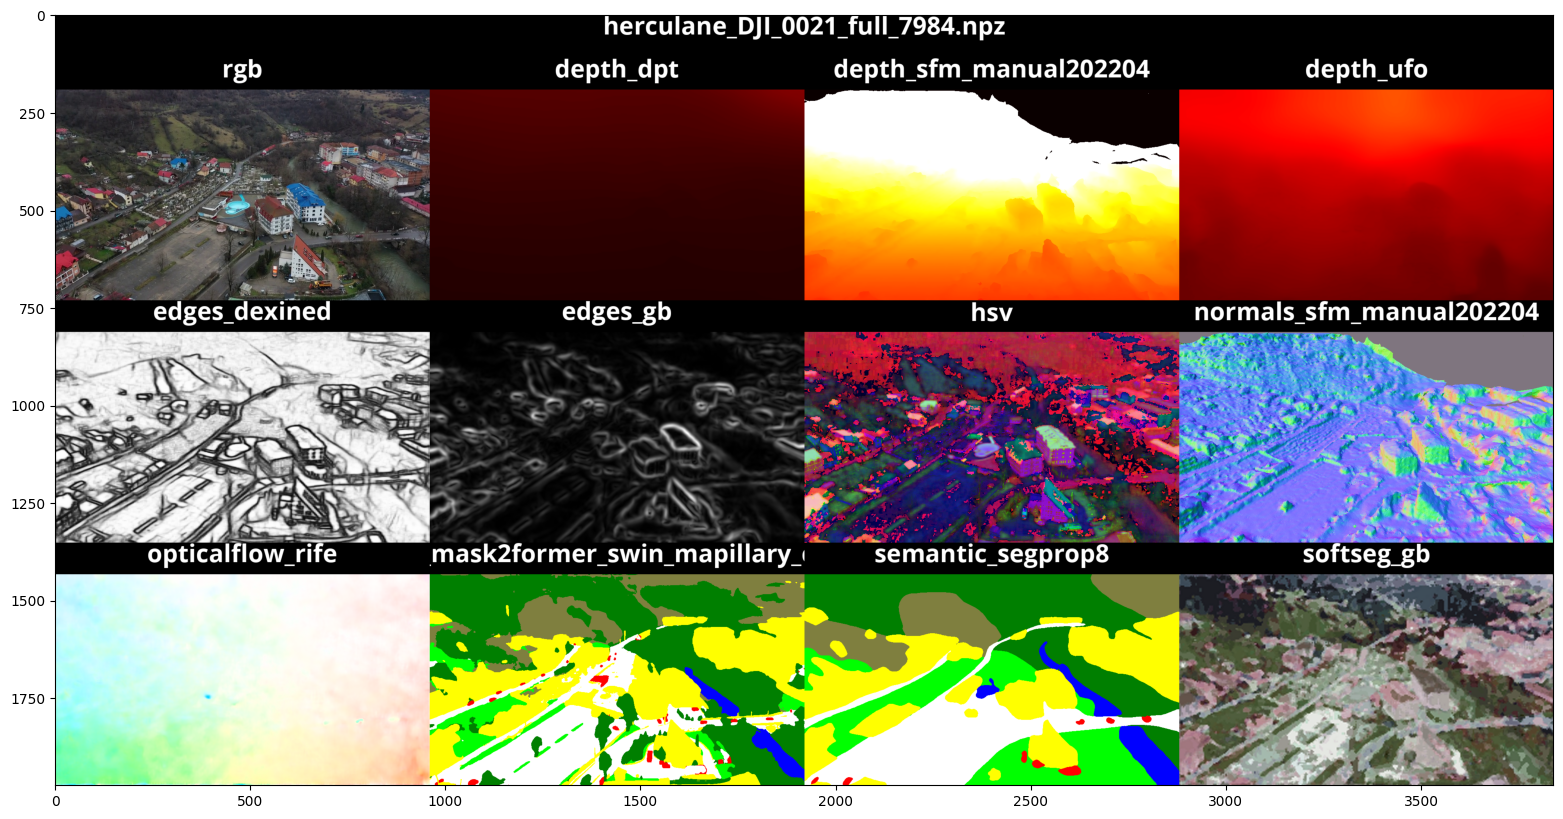

In [7]:
print("== Random loaded item ==")
rand_ix = random.randint(0, len(reader))
data, name, repr_names = reader[rand_ix] # get a random item
print(name)
img_data = {}
for k, v in data.items():
    img_data[k] = reader.name_to_task[k].plot_fn(v) if v is not None else np.zeros((*reader.data_shape[k][0:2], 3))
if "rgb" in img_data: # move rgb as 1st item in the collage
    img_data = {"rgb": img_data["rgb"], **{k: v for k, v in img_data.items() if k != "rgb"}}
# pprint({k: v.shape for k, v in img_data.items()})
collage = collage_fn(list(img_data.values()), titles=img_data.keys(), size_px=55)
collage = image_add_title(collage, name, size_px=55, top_padding=110)
plt.figure(figsize=(20, 10))
plt.imshow(collage)
image_write(collage, f"collage_{name}.png")